In [270]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.feature_selection import SelectKBest, f_classif


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [271]:
train = pd.read_csv('titanic_train.csv', index_col=0)   

In [272]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [273]:
#Age imputation based on class mean
def fill_age(Age, Pclass):
    if pd.isna(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train.apply(lambda x: fill_age(x['Age'], x['Pclass']), axis=1)
train.isnull().sum() 

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [274]:
#one hot the Sex
m_o_f = pd.get_dummies(train['Sex'], drop_first=True, dtype= float)
train = pd.concat([train, m_o_f], axis=1)
train.head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [275]:
train = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [276]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,1.0
2,1,1,38.0,1,0,71.2833,0.0
3,1,3,26.0,0,0,7.9250,0.0
4,1,1,35.0,1,0,53.1000,0.0
5,0,3,35.0,0,0,8.0500,1.0


In [277]:
X = train.drop('Survived', axis=1).values
y = train['Survived'].values

In [278]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [279]:
model = Sequential()
model.add(Dense(11, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(6, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [280]:
model.fit(X, y, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7531 - loss: 0.6254 - val_accuracy: 0.8111 - val_loss: 0.5645
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7771 - loss: 0.5630 - val_accuracy: 0.8111 - val_loss: 0.5242
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7743 - loss: 0.5394 - val_accuracy: 0.8111 - val_loss: 0.4967
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7923 - loss: 0.5094 - val_accuracy: 0.8000 - val_loss: 0.4781
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7807 - loss: 0.5077 - val_accuracy: 0.8000 - val_loss: 0.4678
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7922 - loss: 0.4939 - val_accuracy: 0.7778 - val_loss: 0.4561
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8022 - loss: 0.4739 - val_accuracy: 0.7889 - val_loss: 0.4474
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7972 - loss: 0.4601 - val_accuracy: 0.78

In [281]:
loss = pd.DataFrame(model.history.history)

In [282]:
loss.head()

,accuracy,loss,val_accuracy,val_loss
0,0.771536,0.607137,0.811111,0.564538
1,0.781523,0.562285,0.811111,0.524194
2,0.781523,0.528091,0.811111,0.496730
3,0.785268,0.507275,0.800000,0.478120
4,0.786517,0.497104,0.800000,0.467786


<Axes: >

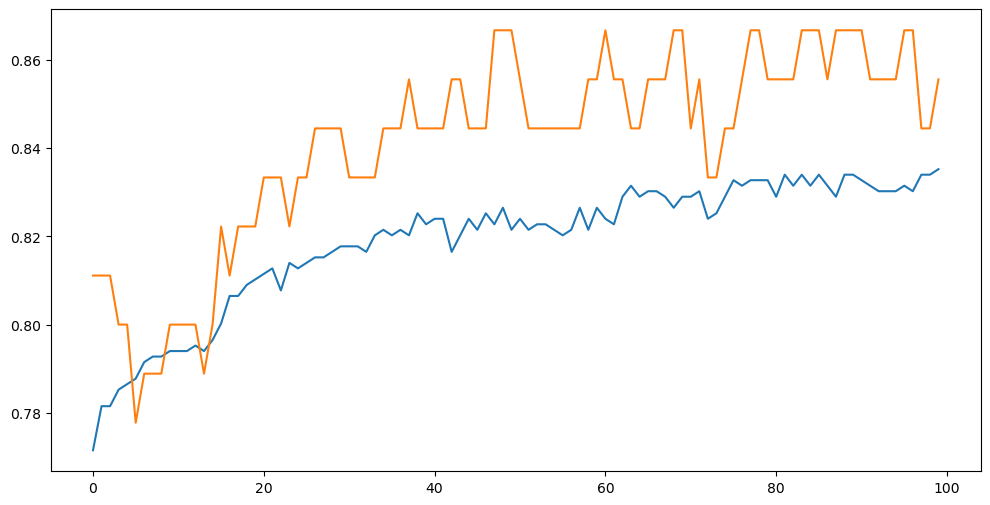

In [283]:
loss['accuracy'].plot(figsize=(12,6))
loss['val_accuracy'].plot()

In [284]:
test = pd.read_csv('titanic_test.csv', index_col= 0 )
test_id = test.index
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [285]:
test['Age'] = test.apply(lambda x: fill_age(x['Age'], x['Pclass']), axis=1)
m_o_f_test = pd.get_dummies(test['Sex'], drop_first=True, dtype= float)
test = pd.concat([test, m_o_f_test], axis=1)

In [286]:
test = test.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [287]:
test = test.values

In [288]:
test = scaler.transform(test)

In [289]:
test

array([[ 0.82737724,  0.4104821 , -0.4745452 , -0.47367361, -0.49078316,
         0.73769513],
       [ 0.82737724,  1.35479788,  0.43279337, -0.47367361, -0.50747884,
        -1.35557354],
       [-0.36936484,  2.48797683, -0.4745452 , -0.47367361, -0.45336687,
         0.73769513],
       ...,
       [ 0.82737724,  0.71266315, -0.4745452 , -0.47367361, -0.50244517,
         0.73769513],
       [ 0.82737724, -0.38274316, -0.4745452 , -0.47367361, -0.48633742,
         0.73769513],
       [ 0.82737724, -0.38274316,  0.43279337,  0.76762988, -0.19824428,
         0.73769513]])

In [290]:
predictions = model.predict(test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [291]:
pred_df = pd.DataFrame(predictions)
id_df = pd.DataFrame(test_id)

In [292]:
pred_df = pd.concat([pred_df, id_df], axis = 1)

In [293]:
pred_df.columns = ['survived', 'PassengerId']

In [294]:
pred_df.set_index('PassengerId', inplace=True)

In [295]:
def get_binary_survived (survived):
    if survived <0.6:
        return 0
    else:
        return 1
pred_df['survived'] = pred_df['survived'].apply(lambda x : get_binary_survived(x))

In [296]:
pred_df

,survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [297]:
pred_df.head()

,survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [298]:
pred_df.to_csv('submission.csv')

In [299]:
submission = pd.read_csv('submission.csv') 
submission.head(10)

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
